In [1]:
#import packages
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def parse_row(row):
    row = row.split(".")[0]
    return row

def to_hyperthyroid(row):
    if row != "negative":
        row = "hyperthyroid"
    return row

def to_hypothyroid(row):
    if row != "negative":
        row = "hypothyroid"
    return row



In [3]:
columns = ['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'category']

In [4]:
hyper_data = pd.read_csv("allhyper.csv", names=columns)
hypo_data = pd.read_csv("allhypo.csv", names=columns)
sick_data = pd.read_csv("sick.csv", names=columns)

In [5]:
hyper_data.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'category'],
      dtype='object')

In [6]:
hyper_data['category'] = hyper_data['category'] \
                            .apply(parse_row) \
                            .apply(to_hyperthyroid)

hypo_data['category'] = hypo_data['category'] \
                            .apply(parse_row) \
                            .apply(to_hypothyroid)

sick_data['category'] = sick_data['category'] \
                            .apply(parse_row)

In [7]:
thyroid_frames = [hyper_data, hypo_data, sick_data]
thyroid_data = pd.concat(thyroid_frames) \
                 .drop_duplicates() \
                 .drop(['TBG', 'TBG measured'], axis=1)

In [8]:
classes = thyroid_data['category'].unique()

In [9]:
thyroid_data.shape

(3221, 28)

In [10]:
thyroid_data.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
referral source              0
category                     0
dtype: int64

<AxesSubplot:>

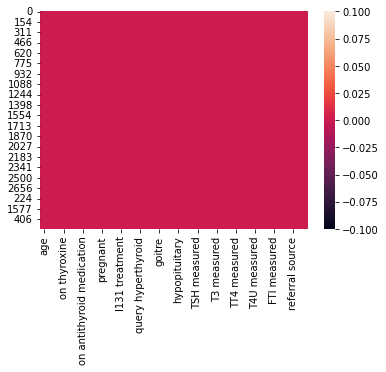

In [11]:
sns.heatmap(thyroid_data.isnull())

In [12]:
print("Number of samples:", len(thyroid_data))

Number of samples: 3221


In [13]:
thyroid_data.head(5)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,category
0,41,F,f,f,f,f,f,f,f,f,...,t,2.5,t,125,t,1.14,t,109,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,2,t,102,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,f,?,t,109,t,0.91,t,120,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,1.9,t,175,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,1.2,t,61,t,0.87,t,70,SVI,negative


In [14]:
thyroid_data['referral source'].value_counts()

other    1795
SVI       994
SVHC      289
STMW      106
SVHD       37
Name: referral source, dtype: int64

In [15]:
thyroid_data['category'].value_counts()

negative        2753
hypothyroid      220
sick             171
hyperthyroid      77
Name: category, dtype: int64

In [16]:
thyroid_data.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,category
count,3221,3221,3221,3221,3221,3221,3221,3221,3221,3221,...,3221,3221,3221,3221,3221,3221,3221,3221,3221,3221
unique,94,3,2,2,2,2,2,2,2,2,...,2,65,2,218,2,139,2,210,5,4
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,t,?,other,negative
freq,91,2108,2878,3173,3186,3080,3175,3180,3165,3010,...,2632,589,3079,142,2945,276,2947,274,1795,2753


#binary_cols=['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'category']
#for col in binary_cols: convert_category(thyroid_data, col)

In [17]:
thyroid_data.dtypes

age                          object
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
referral source              object
category                    

In [18]:
#replace the '?' values with numpy nan
for column in thyroid_data.columns:
    count=thyroid_data[column][thyroid_data[column]=='?'].count()
    if count != 0:
        print(column,thyroid_data[column][thyroid_data[column]=='?'].count())

age 1
sex 127
TSH 247
T3 589
TT4 142
T4U 276
FTI 274


In [19]:
for column in thyroid_data.columns:
    count=thyroid_data[column][thyroid_data[column]== '?'].count()
    if count!=0:
        thyroid_data[column]=thyroid_data[column].replace('?',np.nan)

In [20]:
for column in thyroid_data.columns:
    count=thyroid_data[column][thyroid_data[column]=='?'].count()
    if count == 0:
        print(column,thyroid_data[column][thyroid_data[column]=='?'].count())

age 0
sex 0
on thyroxine 0
query on thyroxine 0
on antithyroid medication 0
sick 0
pregnant 0
thyroid surgery 0
I131 treatment 0
query hypothyroid 0
query hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
TSH measured 0
TSH 0
T3 measured 0
T3 0
TT4 measured 0
TT4 0
T4U measured 0
T4U 0
FTI measured 0
FTI 0
referral source 0
category 0


In [21]:
##  Unique Values
for column in thyroid_data.columns:
    print(column,(thyroid_data[column].unique()))

age ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' nan '93' '92']
sex ['F' 'M' nan]
on thyroxine ['f' 't']
query on thyroxine ['f' 't']
on antithyroid medication ['f' 't']
sick ['f' 't']
pregnant ['f' 't']
thyroid surgery ['f' 't']
I131 treatment ['f' 't']
query hypothyroid ['f' 't']
query hyperthyroid ['f' 't']
lithium ['f' 't']
goitre ['f' 't']
tumor ['f' 't']
hypopituitary ['f' 't']
psych ['f' 't']
TSH measured ['t' 'f']
TSH ['1.3' '4.1' '0.98' '0.16' '0.72' '0.03' nan '2.2' '0.6' '2.4' '1.1' '2.8'
 '3.3' '12' '1.2' '1.5' '6' '2.1' '0.1' '0.8' '1.9' '3.1' '0.2' '13' '0.3'
 '0.035' 

In [22]:
thyroid_data['age'].fillna((thyroid_data['age'].median()), inplace = True)
thyroid_data['TSH'].fillna((thyroid_data['TSH'].median()), inplace = True)
thyroid_data['T3'].fillna((thyroid_data['T3'].median()), inplace = True)
thyroid_data['TT4'].fillna((thyroid_data['TT4'].median()), inplace = True)
thyroid_data['T4U'].fillna((thyroid_data['T4U'].median()), inplace = True)
thyroid_data['FTI'].fillna((thyroid_data['FTI'].median()), inplace = True)

In [23]:
## Impute nan value of sex column
thyroid_data['sex_Var']=np.where(thyroid_data['sex'].isnull(),1,0)
frequent=thyroid_data['sex'].mode()[0]
thyroid_data['sex'].fillna(frequent,inplace=True)

In [24]:
##  Unique Values
for column in thyroid_data.columns:
    print(column,(thyroid_data[column].unique()))

age ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' 55.0 '93' '92']
sex ['F' 'M']
on thyroxine ['f' 't']
query on thyroxine ['f' 't']
on antithyroid medication ['f' 't']
sick ['f' 't']
pregnant ['f' 't']
thyroid surgery ['f' 't']
I131 treatment ['f' 't']
query hypothyroid ['f' 't']
query hyperthyroid ['f' 't']
lithium ['f' 't']
goitre ['f' 't']
tumor ['f' 't']
hypopituitary ['f' 't']
psych ['f' 't']
TSH measured ['t' 'f']
TSH ['1.3' '4.1' '0.98' '0.16' '0.72' '0.03' 1.5 '2.2' '0.6' '2.4' '1.1' '2.8'
 '3.3' '12' '1.2' '1.5' '6' '2.1' '0.1' '0.8' '1.9' '3.1' '0.2' '13' '0.3'
 '0.035' '2.

In [25]:
# A quick fix needed
thyroid_data.loc[thyroid_data['age'] == '455', 'age'] = '45'

In [26]:
thyroid_data.dtypes

age                          object
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
referral source              object
category                    

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [28]:
thyroid_data['age']=pd.to_numeric(thyroid_data.age)

In [29]:
thyroid_data['sex'] = le.fit_transform(thyroid_data["sex"])

In [30]:
thyroid_data['on thyroxine'] = le.fit_transform(thyroid_data["on thyroxine"])

In [31]:
thyroid_data['query on thyroxine'] = le.fit_transform(thyroid_data["query on thyroxine"])

In [32]:
thyroid_data['on antithyroid medication'] = le.fit_transform(thyroid_data["on antithyroid medication"])

In [33]:
thyroid_data['sick'] = le.fit_transform(thyroid_data["sick"])

In [34]:
thyroid_data['pregnant'] = le.fit_transform(thyroid_data["pregnant"])

In [35]:
thyroid_data['thyroid surgery'] = le.fit_transform(thyroid_data["thyroid surgery"])

In [36]:
thyroid_data['I131 treatment'] = le.fit_transform(thyroid_data["I131 treatment"])

In [37]:
thyroid_data['query hypothyroid'] = le.fit_transform(thyroid_data["query hypothyroid"])

In [38]:
thyroid_data['query hyperthyroid'] = le.fit_transform(thyroid_data["query hyperthyroid"])

In [39]:
thyroid_data['lithium'] = le.fit_transform(thyroid_data["lithium"])

In [40]:
thyroid_data['goitre'] = le.fit_transform(thyroid_data["goitre"])

In [41]:
thyroid_data['tumor'] = le.fit_transform(thyroid_data["tumor"])

In [42]:
thyroid_data['hypopituitary'] = le.fit_transform(thyroid_data["hypopituitary"])

In [43]:
thyroid_data['psych'] = le.fit_transform(thyroid_data["psych"])

In [44]:
thyroid_data['TSH measured'] = le.fit_transform(thyroid_data["TSH measured"])

In [45]:
thyroid_data['TSH'] = pd.to_numeric(thyroid_data["TSH"])

In [46]:
thyroid_data['T3 measured'] = le.fit_transform(thyroid_data["T3 measured"])

In [47]:
thyroid_data['T3'] = pd.to_numeric(thyroid_data["T3"])

In [48]:
thyroid_data['TT4 measured'] = le.fit_transform(thyroid_data["TT4 measured"])

In [49]:
thyroid_data['TT4'] = pd.to_numeric(thyroid_data["TT4"])

In [50]:
thyroid_data['T4U measured'] = le.fit_transform(thyroid_data["T4U measured"])

In [51]:
#thyroid_data['T4U'] = le.fit_transform(thyroid_data["T4U"])

In [52]:
thyroid_data['FTI measured'] = le.fit_transform(thyroid_data["FTI measured"])

In [53]:
thyroid_data['FTI'] = pd.to_numeric(thyroid_data["FTI"])

In [54]:
thyroid_data['referral source'] = le.fit_transform(thyroid_data["referral source"])

In [55]:
thyroid_data['category'] = le.fit_transform(thyroid_data["category"])

In [56]:
##  Unique Values
for column in thyroid_data.columns:
    print(column,(thyroid_data[column].unique()))

age [41. 23. 46. 70. 18. 59. 80. 66. 68. 84. 67. 71. 28. 65. 42. 63. 51. 81.
 54. 55. 60. 25. 73. 34. 78. 37. 85. 26. 58. 64. 44. 48. 61. 35. 83. 21.
 87. 53. 77. 27. 69. 74. 38. 76. 45. 36. 22. 43. 72. 82. 31. 39. 49. 62.
 57.  1. 50. 30. 29. 75. 19.  7. 79. 17. 24. 15. 32. 47. 16. 52. 33. 13.
 10. 89. 56. 20. 90. 40. 88. 14. 86. 94. 12.  4. 11.  8.  5.  2. 91.  6.
 93. 92.]
sex [0 1]
on thyroxine [0 1]
query on thyroxine [0 1]
on antithyroid medication [0 1]
sick [0 1]
pregnant [0 1]
thyroid surgery [0 1]
I131 treatment [0 1]
query hypothyroid [0 1]
query hyperthyroid [0 1]
lithium [0 1]
goitre [0 1]
tumor [0 1]
hypopituitary [0 1]
psych [0 1]
TSH measured [1 0]
TSH [1.30e+00 4.10e+00 9.80e-01 1.60e-01 7.20e-01 3.00e-02 1.50e+00 2.20e+00
 6.00e-01 2.40e+00 1.10e+00 2.80e+00 3.30e+00 1.20e+01 1.20e+00 6.00e+00
 2.10e+00 1.00e-01 8.00e-01 1.90e+00 3.10e+00 2.00e-01 1.30e+01 3.00e-01
 3.50e-02 2.50e+00 5.00e-01 1.70e+00 7.30e+00 1.80e+00 2.60e-01 4.50e+01
 5.40e+00 9.90e-01 2.50e-01 9.2

In [57]:
##  Unique Values
for column in thyroid_data.columns:
    print(column,(thyroid_data[column].unique()))

age [41. 23. 46. 70. 18. 59. 80. 66. 68. 84. 67. 71. 28. 65. 42. 63. 51. 81.
 54. 55. 60. 25. 73. 34. 78. 37. 85. 26. 58. 64. 44. 48. 61. 35. 83. 21.
 87. 53. 77. 27. 69. 74. 38. 76. 45. 36. 22. 43. 72. 82. 31. 39. 49. 62.
 57.  1. 50. 30. 29. 75. 19.  7. 79. 17. 24. 15. 32. 47. 16. 52. 33. 13.
 10. 89. 56. 20. 90. 40. 88. 14. 86. 94. 12.  4. 11.  8.  5.  2. 91.  6.
 93. 92.]
sex [0 1]
on thyroxine [0 1]
query on thyroxine [0 1]
on antithyroid medication [0 1]
sick [0 1]
pregnant [0 1]
thyroid surgery [0 1]
I131 treatment [0 1]
query hypothyroid [0 1]
query hyperthyroid [0 1]
lithium [0 1]
goitre [0 1]
tumor [0 1]
hypopituitary [0 1]
psych [0 1]
TSH measured [1 0]
TSH [1.30e+00 4.10e+00 9.80e-01 1.60e-01 7.20e-01 3.00e-02 1.50e+00 2.20e+00
 6.00e-01 2.40e+00 1.10e+00 2.80e+00 3.30e+00 1.20e+01 1.20e+00 6.00e+00
 2.10e+00 1.00e-01 8.00e-01 1.90e+00 3.10e+00 2.00e-01 1.30e+01 3.00e-01
 3.50e-02 2.50e+00 5.00e-01 1.70e+00 7.30e+00 1.80e+00 2.60e-01 4.50e+01
 5.40e+00 9.90e-01 2.50e-01 9.2

In [58]:
thyroid_data.dtypes

age                          float64
sex                            int32
on thyroxine                   int32
query on thyroxine             int32
on antithyroid medication      int32
sick                           int32
pregnant                       int32
thyroid surgery                int32
I131 treatment                 int32
query hypothyroid              int32
query hyperthyroid             int32
lithium                        int32
goitre                         int32
tumor                          int32
hypopituitary                  int32
psych                          int32
TSH measured                   int32
TSH                          float64
T3 measured                    int32
T3                           float64
TT4 measured                   int32
TT4                          float64
T4U measured                   int32
T4U                           object
FTI measured                   int32
FTI                          float64
referral source                int32
c

In [59]:
thyroid_data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,category,sex_Var
0,41.0,0,0,0,0,0,0,0,0,0,...,2.5,1,125.0,1,1.14,1,109.0,1,2,0
1,23.0,0,0,0,0,0,0,0,0,0,...,2.0,1,102.0,0,0.97,0,106.0,4,2,0
2,46.0,1,0,0,0,0,0,0,0,0,...,1.9,1,109.0,1,0.91,1,120.0,4,2,0
3,70.0,0,1,0,0,0,0,0,0,0,...,1.9,1,175.0,0,0.97,0,106.0,4,2,0
4,70.0,0,0,0,0,0,0,0,0,0,...,1.2,1,61.0,1,0.87,1,70.0,3,2,0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'on thyroxine'}>,
        <AxesSubplot:title={'center':'query on thyroxine'}>,
        <AxesSubplot:title={'center':'on antithyroid medication'}>],
       [<AxesSubplot:title={'center':'sick'}>,
        <AxesSubplot:title={'center':'pregnant'}>,
        <AxesSubplot:title={'center':'thyroid surgery'}>,
        <AxesSubplot:title={'center':'I131 treatment'}>,
        <AxesSubplot:title={'center':'query hypothyroid'}>],
       [<AxesSubplot:title={'center':'query hyperthyroid'}>,
        <AxesSubplot:title={'center':'lithium'}>,
        <AxesSubplot:title={'center':'goitre'}>,
        <AxesSubplot:title={'center':'tumor'}>,
        <AxesSubplot:title={'center':'hypopituitary'}>],
       [<AxesSubplot:title={'center':'psych'}>,
        <AxesSubplot:title={'center':'TSH measured'}>,
        <AxesSubplot:title={'center':'TSH'}>,
        <AxesSubplot:title={'center

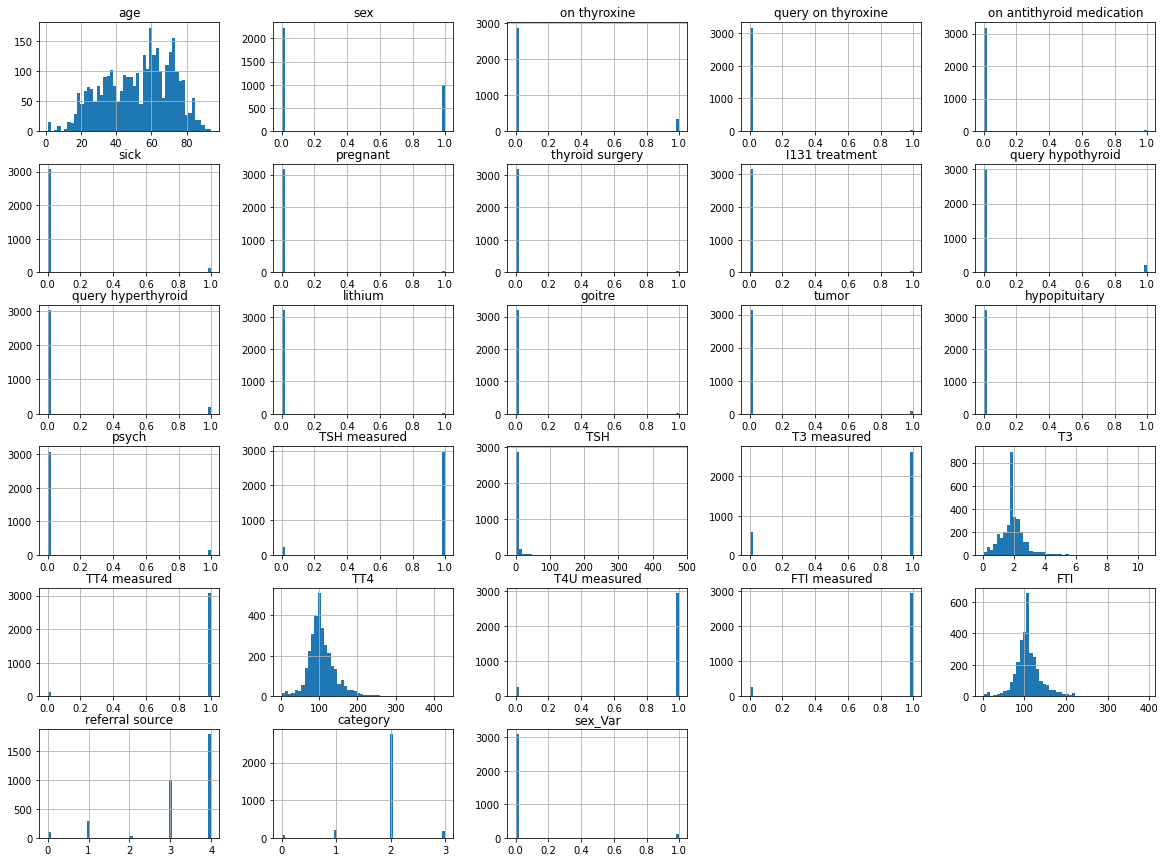

In [60]:
thyroid_data.hist(bins=50,figsize=(20,15))

In [61]:
x = thyroid_data.drop("category",axis=1)
y = thyroid_data["category"]

<AxesSubplot:xlabel='category', ylabel='count'>

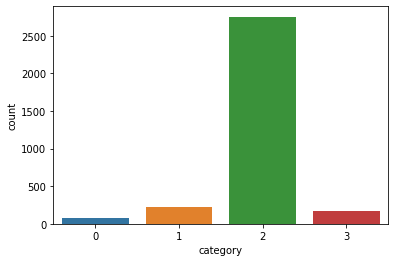

In [62]:
sns.countplot(thyroid_data['category'])

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'referral source', 'sex_Var'],
      dtype='object')

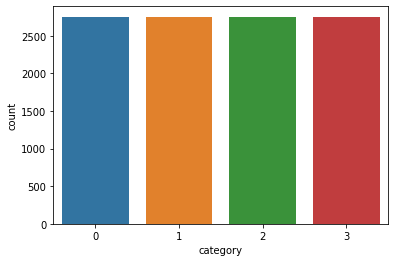

In [63]:
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE


rdsmple=RandomOverSampler()
x_sampled,y_sampled=rdsmple.fit_resample(x,y)

x_sampled.shape


x_sampled=pd.DataFrame(data=x_sampled,columns=x.columns)


x_sampled


sns.countplot(y_sampled)


x_sampled.columns

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_sampled, y_sampled, test_size=0.30, random_state=0)
x_train.shape,x_test.shape

((7708, 28), (3304, 28))

In [65]:
x_train.corr()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,FTI measured,FTI,referral source,sex_Var
age,1.000000,0.055935,-0.019090,-0.044890,-0.016778,0.098169,-0.190543,-0.069437,-0.012309,-0.002248,...,-0.121147,0.090322,-0.241472,0.085718,-0.112603,0.139161,0.139161,-0.039497,0.080469,-0.037299
sex,0.055935,1.000000,-0.017293,0.039401,0.053843,0.062183,-0.079783,-0.032786,-0.037835,0.058078,...,-0.034007,0.088602,-0.131454,0.021803,-0.231757,-0.083023,-0.083023,-0.153213,-0.077930,-0.122727
on thyroxine,-0.019090,-0.017293,1.000000,-0.015285,-0.000617,-0.047557,-0.014373,0.039008,0.104552,0.100936,...,0.064959,-0.109521,-0.025527,-0.037009,-0.011629,-0.001877,-0.001877,-0.036828,0.072891,0.029651
query on thyroxine,-0.044890,0.039401,-0.015285,1.000000,-0.010998,0.050688,-0.009062,0.002990,-0.017339,-0.037165,...,-0.029770,-0.063763,-0.046296,0.016401,-0.024636,0.024816,0.024816,-0.019327,0.039449,-0.026104
on antithyroid medication,-0.016778,0.053843,-0.000617,-0.010998,1.000000,-0.020682,0.010471,-0.007097,-0.001204,-0.020609,...,-0.019756,0.019782,0.069673,-0.011617,-0.047526,0.000718,0.000718,-0.061515,0.045409,-0.018308
sick,0.098169,0.062183,-0.047557,0.050688,-0.020682,1.000000,-0.031913,-0.019028,-0.032607,0.094251,...,-0.037580,0.071638,-0.127002,0.012782,-0.074342,-0.014753,-0.014753,-0.051405,-0.053057,-0.022895
pregnant,-0.190543,-0.079783,-0.014373,-0.009062,0.010471,-0.031913,1.000000,-0.010950,-0.018764,-0.036646,...,-0.036253,-0.010484,0.098860,0.017749,0.144002,0.031954,0.031954,0.032643,-0.318672,-0.028249
thyroid surgery,-0.069437,-0.032786,0.039008,0.002990,-0.007097,-0.019028,-0.010950,1.000000,-0.011188,-0.023982,...,0.055363,-0.052338,-0.006869,0.010583,-0.043168,-0.002651,-0.002651,-0.055106,0.025730,-0.016844
I131 treatment,-0.012309,-0.037835,0.104552,-0.017339,-0.001204,-0.032607,-0.018764,-0.011188,1.000000,0.014919,...,0.005029,-0.065757,0.065047,0.018136,0.008225,0.028375,0.028375,-0.013987,0.100039,-0.019304
query hypothyroid,-0.002248,0.058078,0.100936,-0.037165,-0.020609,0.094251,-0.036646,-0.023982,0.014919,1.000000,...,0.041817,-0.078570,-0.135528,0.024098,-0.118905,-0.062030,-0.062030,-0.097555,-0.021474,0.000032


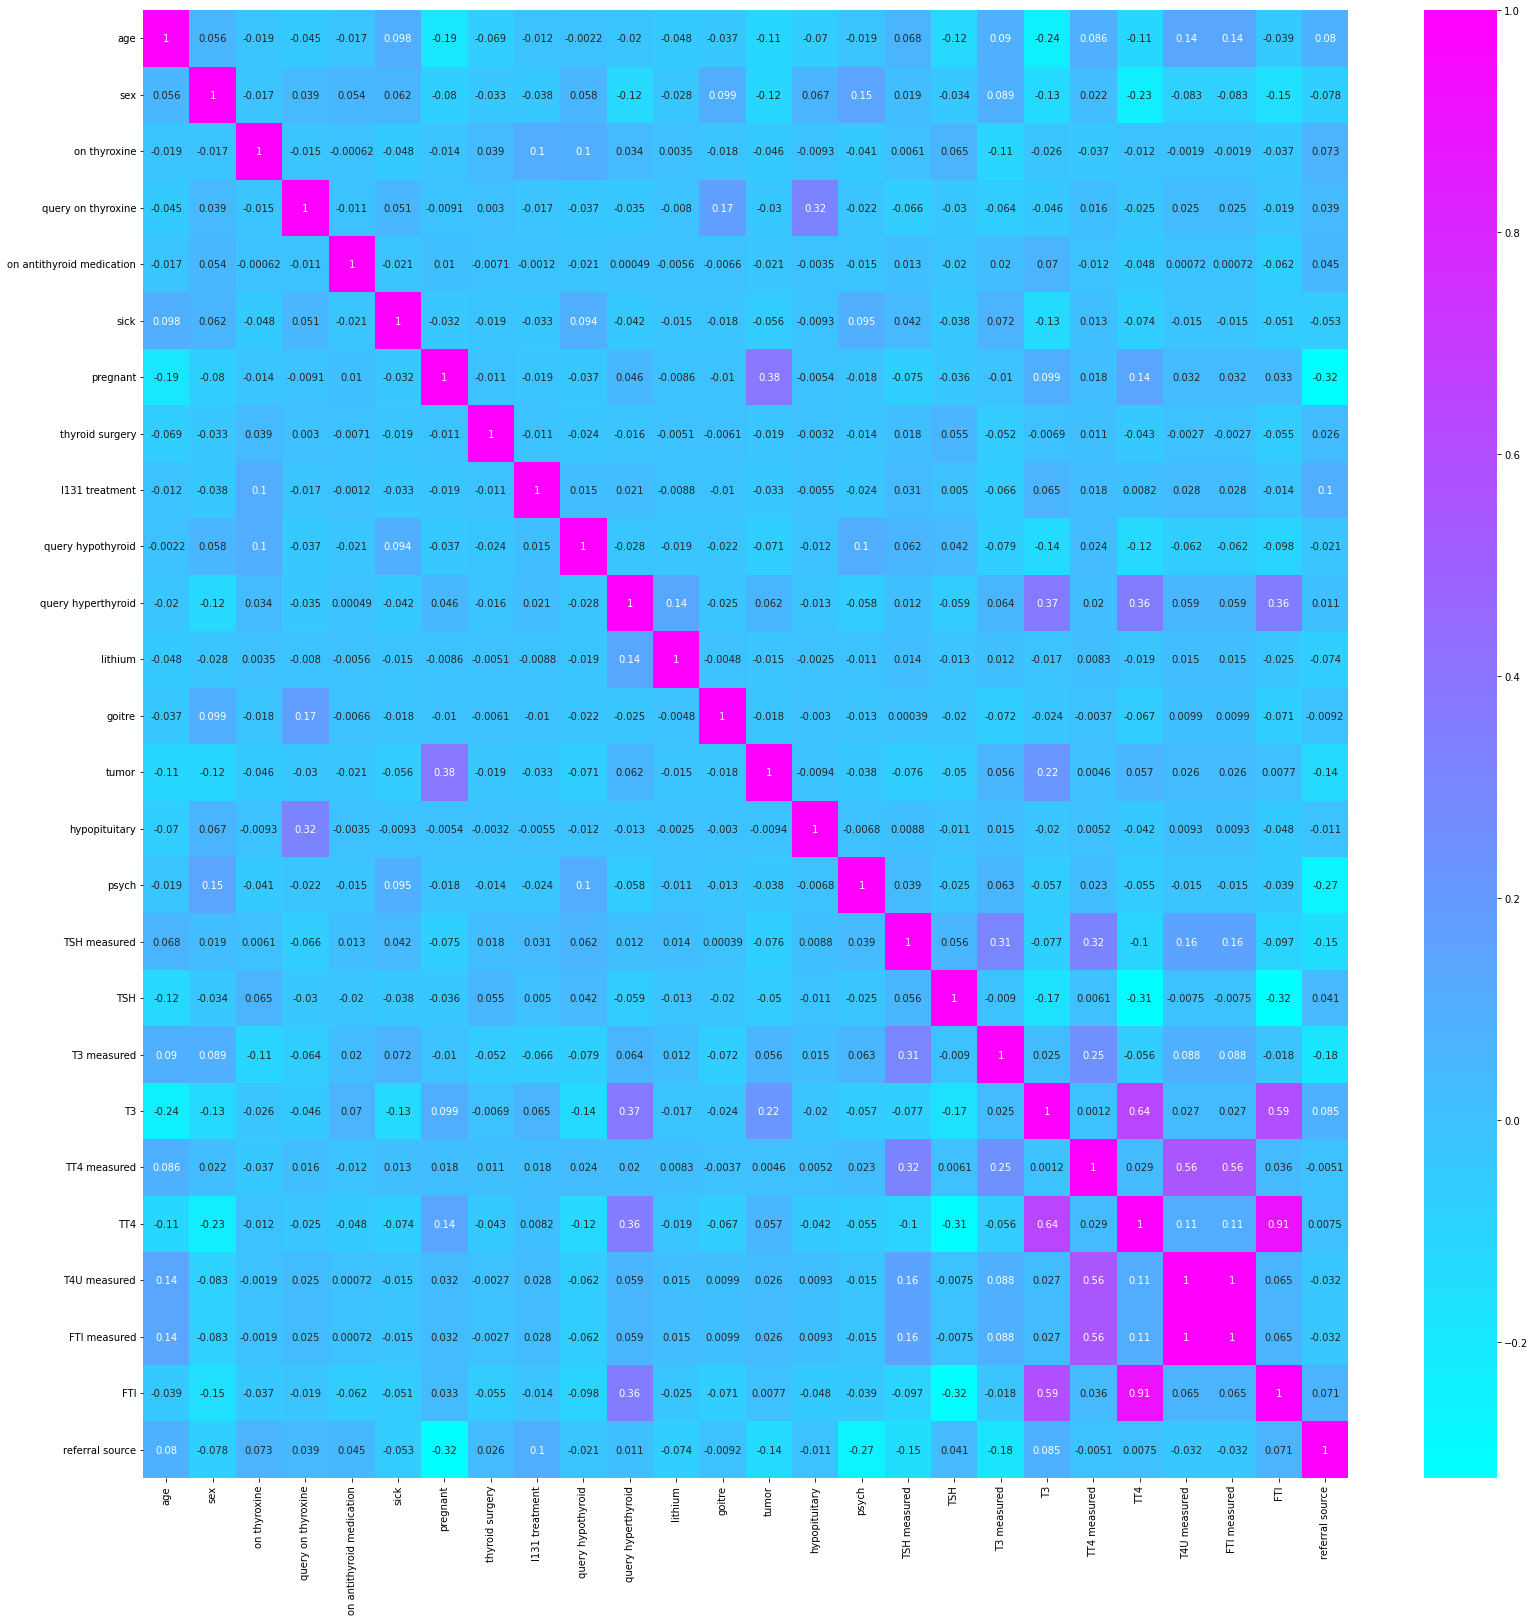

In [66]:
#using pearson correlation
plt.figure(figsize=(27,27))
corr = x_train.iloc[:,:-1].corr()
top_features=corr.index
sns.heatmap(corr, annot=True, cmap=plt.cm.cool)
plt.show()

In [67]:
#find and remove correlated features
def correlation(dataset,threshold):
  col_corr = set()    #set of all the names of correlated columns
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if (corr_matrix.iloc[i,j]) > threshold: #we are interested in absolute correlated value
        colname = corr_matrix.columns[i] #getting the names of columns
        col_corr.add(colname)
  return col_corr

In [68]:
cor_features = correlation(x_train, 0.8)
len(set(cor_features))

2

In [69]:
cor_features

{'FTI', 'FTI measured'}

# Univariate Selection

In [70]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [71]:
ordered_rank_features = SelectKBest(score_func=chi2,k=26)
ordered_features=ordered_rank_features.fit(x_train,y_train)

In [72]:
dfscore=pd.DataFrame(ordered_features.scores_,columns=['score'])
dfcolumns=pd.DataFrame(x_train.columns)

In [73]:
features_rank=pd.concat([dfcolumns,dfscore],axis=1)

In [74]:
features_rank.columns=['features','score']
features_rank

,features,score
0,age,4114.245709
1,sex,356.191079
2,on thyroxine,275.964252
3,query on thyroxine,14.587646
4,on antithyroid medication,31.371583
5,sick,139.962012
6,pregnant,239.473238
7,thyroid surgery,52.896270
8,I131 treatment,26.495827
9,query hypothyroid,160.117881


In [75]:
features_rank.nlargest(27,'score')

,features,score
17,TSH,130755.737316
25,FTI,103538.206129
21,TT4,101432.991956
0,age,4114.245709
19,T3,3553.253738
10,query hyperthyroid,726.517082
13,tumor,473.760145
1,sex,356.191079
2,on thyroxine,275.964252
6,pregnant,239.473238


In [76]:
col_to_drop=["query on thyroxine","on antithyroid medication","thyroid surgery","I131 treatment","lithium","goitre","hypopituitary","psych","TSH measured","T3 measured","TT4 measured","T4U measured","FTI measured","sex_Var"]

In [77]:
x_train=x_train.drop(col_to_drop,axis=1)
x_test=x_test.drop(col_to_drop,axis=1)

In [78]:
x_train.head()

,age,sex,on thyroxine,sick,pregnant,query hypothyroid,query hyperthyroid,tumor,TSH,T3,TT4,T4U,FTI,referral source
3424,64.0,0,0,0,0,0,1,1,1.500,6.1,214.0,0.94,228.0,4
463,73.0,0,0,0,0,0,0,1,0.005,3.6,119.0,0.9,133.0,4
1722,35.0,0,0,0,0,0,0,0,0.150,5.1,167.0,1,168.0,4
6155,65.0,0,0,0,0,0,0,0,55.000,0.7,15.0,1.08,14.0,3
6030,34.0,0,0,0,0,0,0,0,82.000,0.2,5.8,0.97,106.0,3


In [79]:
x_train.shape,x_test.shape

((7708, 14), (3304, 14))

# Decision tree classifer

In [80]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)
dt.score(x_test,y_test)
y_pred=dt.predict(x_test)
dt.score(x_test,y_test)

0.8925544794188862

In [81]:
y_pred=dt.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[850,   0,  11,   0],
       [  0, 750,   0,  76],
       [ 63,  60, 612,  61],
       [ 70,  14,   0, 737]], dtype=int64)

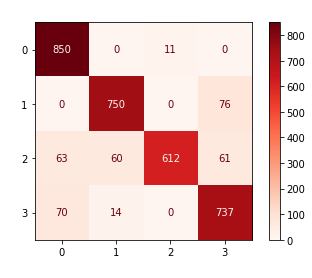

In [82]:
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(dt,x_test,y_test,cmap=plt.cm.Reds)
matrix.ax_.set_title('confusion Matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.show()

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       861
           1       0.91      0.91      0.91       826
           2       0.98      0.77      0.86       796
           3       0.84      0.90      0.87       821

    accuracy                           0.89      3304
   macro avg       0.90      0.89      0.89      3304
weighted avg       0.90      0.89      0.89      3304



# Random Forest Classifer

In [132]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.9119249394673123

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=10)
gb.fit(x_train,y_train)
gb.score(x_test,y_test)

0.9019370460048426

In [86]:
from sklearn.naive_bayes import GaussianNB
nb_clf= GaussianNB()
nb_clf.fit(x_train,y_train)
nb_clf.score(x_test,y_test)

0.6340799031476998

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.8762106537530266

In [88]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.7315375302663438

In [89]:
from sklearn.svm import SVC
sv= SVC(probability=True)
sv.fit(x_train,y_train)
sv.score(x_test,y_test)

0.7418280871670703

In [90]:
from sklearn.svm import SVC
sv= SVC(probability=True)
sv.fit(x_train,y_train)
sv.score(x_test,y_test)

0.7418280871670703

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
scaled_train = scaler.transform(x_train)
scaler.fit(x_test)
scaled_test = scaler.transform(x_test)

In [92]:
scaled_train

array([[ 0.48335357, -0.58873658, -0.23518537, ..., -0.10531687,
         1.79735947,  0.72248795],
       [ 0.95392073, -0.58873658, -0.23518537, ..., -0.32012528,
         0.18165995,  0.72248795],
       [-1.03291838, -0.58873658, -0.23518537, ...,  0.21689574,
         0.77691767,  0.72248795],
       ...,
       [ 1.3199174 ,  1.69855251, -0.23518537, ...,  0.86132096,
        -0.03943577, -0.28765845],
       [ 0.90163549, -0.58873658, -0.23518537, ..., -0.69603999,
         1.61027848, -0.28765845],
       [ 1.26763216,  1.69855251, -0.23518537, ..., -0.58863579,
         0.24968941, -0.28765845]])

# SVM

In [93]:
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

svc = SVC(kernel="linear")
svc.fit(scaled_train,y_train)
y_pred=svc.predict(scaled_test)
accuracy_score(y_test,y_pred)

0.8374697336561744

In [94]:
y_pred=svc.predict(scaled_test)
accuracy_score(y_test,y_pred)

0.8374697336561744

In [95]:
confusion_matrix(y_test,y_pred)

array([[816,   0,  45,   0],
       [  0, 662,  73,  91],
       [ 63,  54, 585,  94],
       [ 70,  22,  25, 704]], dtype=int64)

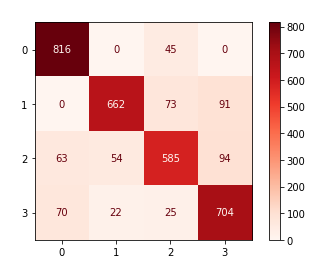

In [96]:
matrix = plot_confusion_matrix(svc,scaled_test,y_test,cmap=plt.cm.Reds)
matrix.ax_.set_title('confusion Matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.show()

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.86      0.95      0.90       861
           1       0.90      0.80      0.85       826
           2       0.80      0.73      0.77       796
           3       0.79      0.86      0.82       821

    accuracy                           0.84      3304
   macro avg       0.84      0.84      0.83      3304
weighted avg       0.84      0.84      0.84      3304



In [98]:
svc = SVC(kernel="sigmoid")
svc.fit(scaled_train,y_train)

SVC(kernel='sigmoid')

In [99]:
y_pred=svc.predict(scaled_test)

accuracy_score(y_test,y_pred)

0.6610169491525424

In [100]:
confusion_matrix(y_test,y_pred)

array([[737,  30,  81,  13],
       [ 43, 470, 180, 133],
       [123, 161, 398, 114],
       [ 66,  91,  85, 579]], dtype=int64)

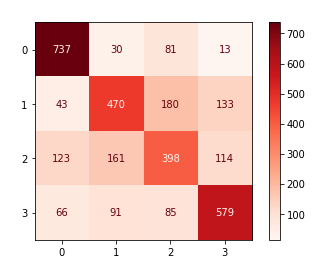

In [101]:
matrix = plot_confusion_matrix(svc,scaled_test,y_test,cmap=plt.cm.Reds)
matrix.ax_.set_title('confusion Matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.show()

In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       861
           1       0.62      0.57      0.60       826
           2       0.53      0.50      0.52       796
           3       0.69      0.71      0.70       821

    accuracy                           0.66      3304
   macro avg       0.65      0.66      0.65      3304
weighted avg       0.65      0.66      0.66      3304



In [103]:
svc = SVC(kernel="rbf")
svc.fit(scaled_train,y_train)

SVC()

In [104]:
y_pred=svc.predict(scaled_test)
accuracy_score(y_test,y_pred)

0.8707627118644068

In [105]:
confusion_matrix(y_test,y_pred)

array([[861,   0,   0,   0],
       [  0, 697,  56,  73],
       [ 38,  71, 603,  84],
       [ 70,  30,   5, 716]], dtype=int64)

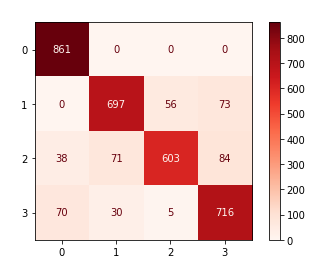

In [106]:
matrix = plot_confusion_matrix(svc,scaled_test,y_test,cmap=plt.cm.Reds)
matrix.ax_.set_title('confusion Matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.show()

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       861
           1       0.87      0.84      0.86       826
           2       0.91      0.76      0.83       796
           3       0.82      0.87      0.85       821

    accuracy                           0.87      3304
   macro avg       0.87      0.87      0.87      3304
weighted avg       0.87      0.87      0.87      3304



In [108]:
svc = SVC(kernel="poly")
svc.fit(scaled_train,y_train)

SVC(kernel='poly')

In [109]:
y_pred=svc.predict(scaled_test)
accuracy_score(y_test,y_pred)

0.788135593220339

In [110]:
confusion_matrix(y_test,y_pred)

array([[828,   0,  33,   0],
       [  0, 473, 263,  90],
       [ 35,  68, 614,  79],
       [ 70,  27,  35, 689]], dtype=int64)

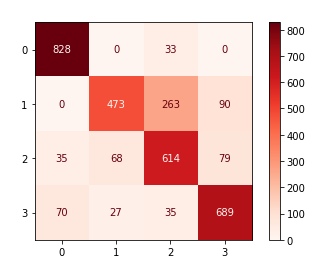

In [111]:
matrix = plot_confusion_matrix(svc,scaled_test,y_test,cmap=plt.cm.Reds)
matrix.ax_.set_title('confusion Matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.show()

In [112]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       861
           1       0.83      0.57      0.68       826
           2       0.65      0.77      0.71       796
           3       0.80      0.84      0.82       821

    accuracy                           0.79      3304
   macro avg       0.79      0.79      0.78      3304
weighted avg       0.80      0.79      0.78      3304



KNN

In [113]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [114]:
knn.fit(scaled_train,y_train)
y_pred=knn.predict(scaled_test)
accuracy_score(y_test,y_pred)

0.8519975786924939

In [115]:
confusion_matrix(y_test,y_pred)

array([[794,   0,   5,  62],
       [  0, 734,  48,  44],
       [ 25,  85, 625,  61],
       [ 53,  28,  78, 662]], dtype=int64)

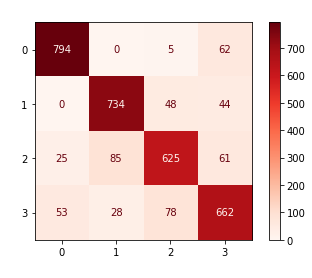

In [116]:
matrix = plot_confusion_matrix(knn,scaled_test,y_test,cmap=plt.cm.Reds)
matrix.ax_.set_title('confusion Matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.show()

In [117]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       861
           1       0.87      0.89      0.88       826
           2       0.83      0.79      0.81       796
           3       0.80      0.81      0.80       821

    accuracy                           0.85      3304
   macro avg       0.85      0.85      0.85      3304
weighted avg       0.85      0.85      0.85      3304



In [118]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=10)
gb.fit(scaled_train,y_train)
y_pred=gb.predict(scaled_test)
accuracy_score(y_test,y_pred)

0.8789346246973365

In [119]:
confusion_matrix(y_test,y_pred)

array([[842,   0,  19,   0],
       [  0, 700,  59,  67],
       [ 40,  61, 639,  56],
       [ 63,  14,  21, 723]], dtype=int64)

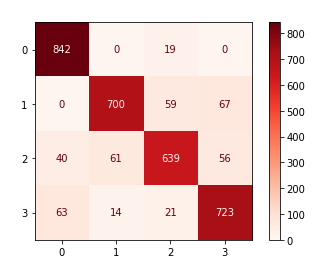

In [120]:
matrix = plot_confusion_matrix(gb,scaled_test,y_test,cmap=plt.cm.Reds)
matrix.ax_.set_title('confusion Matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.show()

#Decision Tree

In [121]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(scaled_train,y_train)
y_pred=dt.predict(scaled_test)
accuracy_score(y_test,y_pred)

0.8535108958837773

In [122]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [123]:
rf.fit(scaled_train,y_train)
y_pred=rf.predict(scaled_test)
accuracy_score(y_test,y_pred)

0.8931598062953995

In [124]:
confusion_matrix(y_test,y_pred)

array([[850,   0,  11,   0],
       [  0, 721,  53,  52],
       [ 24,  62, 660,  50],
       [ 70,  31,   0, 720]], dtype=int64)

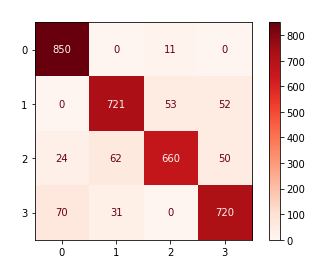

In [125]:
matrix = plot_confusion_matrix(rf,scaled_test,y_test,cmap=plt.cm.Reds)
matrix.ax_.set_title('confusion Matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.show()

In [126]:
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(x_train,y_train)
y_pred = classifier_forest.predict(scaled_test)

print(f'Train Score:{classifier_forest.score(x_train,y_train)}\n Test Score:{classifier_forest.score(x_test,y_test)}')

Train Score:0.9174883238194084
 Test Score:0.912227602905569


In [127]:
accuracy_score(y_test,y_pred)

0.20853510895883778